In [1]:
# librerias necesarias
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
plt.rcParams["figure.figsize"] = (14,4)

def plot_stem( t , y, y_lim=None, view_baseline=True, title=None):
    """Función que configura y visualiza un gráfico stem 

       Parámetros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los límites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una línea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)
    plt.setp(baseline, visible=view_baseline)
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    if 0 in t:
        plt.axvline(x=0, linewidth=1,color="black")
    
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()

def escalon(n): return 1.0*(np.array(n) >= 0)
def impulso(n): return 1.0*(np.array(n) == 0)

def own_correlation_lags(in1_len, in2_len):
    '''
    Calcula el array de índices que representan los lags o desplazamientos para la correlación 1-D
    
    Parámetros
    in1_len: longitud de la primera señal en la operación de correlación
    in2_len: longitud de la segunda señal en la operación de correlación
    Return
    array de índices que representan los lags
    '''
    return np.arange(-in2_len + 1, in1_len)

In [2]:
# 1.- Calcular energía y potencia de una señal sinusoidal
def fs(n, a, f, fase):
    return a*np.cos(2*np.pi*f*n + fase)

a = 1.1
f = 0.01/2.0
fase = np.pi/4

periodo = np.arange(0, 1/f)

valores_fs_periodo = fs(periodo, a, f, fase)
energia_periodo = np.sum(valores_fs_periodo**2)
potencia_periodo = energia_periodo/len(periodo)

print("energia infinita")
print("energia en un periodo:",energia_periodo)
print("potencia en un periodo:",potencia_periodo)

energia infinita
energia en un periodo: 121.00000000000003
potencia en un periodo: 0.6050000000000001


In [3]:
# 5.- Ecuación diferencial
# y[n] - 1/4 y[n-1] + 1/8 y[n-2] = 2 x[n-1]
a = [1, -1/4, 1/8]
b = [0, 2]
x = impulso(np.arange(10))

# Apartado 1:
y = sp.signal.lfilter(b, a, x)

# Apartado 2:
condiciones_iniciales = sp.signal.lfiltic(b, a, [0])
y2, _ = sp.signal.lfilter(b, a, x, zi=condiciones_iniciales)

print(y)
print(y2)

[ 0.00000000e+00  2.00000000e+00  5.00000000e-01 -1.25000000e-01
 -9.37500000e-02 -7.81250000e-03  9.76562500e-03  3.41796875e-03
 -3.66210938e-04 -5.18798828e-04]
[ 0.00000000e+00  2.00000000e+00  5.00000000e-01 -1.25000000e-01
 -9.37500000e-02 -7.81250000e-03  9.76562500e-03  3.41796875e-03
 -3.66210938e-04 -5.18798828e-04]


In [4]:
# 2.- Generar las h
r = np.arange(10+1)

h1 = impulso(r)-3*impulso(r-1)
h2 = 0.5*escalon(r)
h3 = 1/3*escalon(r)
h4 = (r-1)*escalon(r)
h5 = impulso(r) + impulso(r-2)

print("h_global = h1*h2*(h3+h4)*h5")

# Definido entre 0 y 10
h12 = np.convolve(h1, h2)
h34 = h3+h4
h1234 = np.convolve(h12, h34)
h_global = np.convolve(h1234, h5)

# Calcular respuesta
x = (-0.4)**(r-3)*escalon(r)
y = np.convolve(h_global, x)
#print(y)
#print(x)

# Apartado 4:
x1 = [1, 0, 0, 0]
y1 = np.convolve(h4, x1)
print("x1:",x1)
print("y1:",y1)

x2 = [0, 0, 1, 0]
y2 = np.convolve(h4, x2)
print("x2:",x2)
print("y2:",y2)

h_global = h1*h2*(h3+h4)*h5
x1: [1, 0, 0, 0]
y1: [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  0.  0.  0.]
x2: [0, 0, 1, 0]
y2: [ 0.  0. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  0.]


In [5]:
# 4.- Convolución y deconvolución
def calc_sistema(n):
    a = n
    b = np.insert(a, 0, 0)
    c = np.insert(b, 0, 0)
    d = np.insert(c, 0, 0)
    return 2*a[:len(n)] + b[:len(n)] + c[:len(n)] + d[:len(n)]

r = np.arange(10+1)

h = calc_sistema(impulso(r))
x = 5*impulso(r-2) + 2*escalon(r) - escalon(r-8)

print("h:",h)
print("x:",x)

y = np.convolve(h, x)
print("y_c:",y)

# Apartado 2:
y2 = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
x_dc, _ = sp.signal.deconvolve(y2, h)
print("x_dc:",x_dc)

# Comprobar:
y3 = np.convolve(h, x_dc)
print("y3",y3)
print("y_original:",y2)
print("Se puede ver que los primeros valores de y3 se parecen a los de la y original, después empieza a alejarse")

h: [2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
x: [2. 2. 7. 2. 2. 2. 2. 2. 1. 1. 1.]
y_c: [ 4.  6. 18. 15. 15. 15. 10. 10.  8.  7.  6.  3.  2.  1.  0.  0.  0.  0.
  0.  0.  0.]
x_dc: [0.5      0.25     0.125    0.0625   0.78125  0.515625]
y3 [1.       1.       1.       1.       2.       2.       1.359375 1.296875
 0.515625 0.       0.       0.       0.       0.       0.       0.      ]
y_original: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
Se puede ver que los primeros valores de y3 se parecen a los de la y original, después empieza a alejarse


C:\Users\adrian.losada.alvare\AppData\Local\Temp\ipykernel_3740\409204780.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


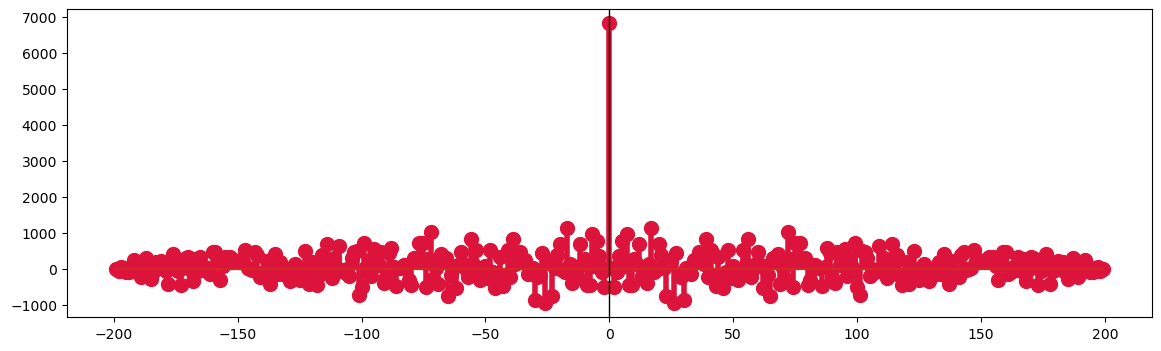

no periódica


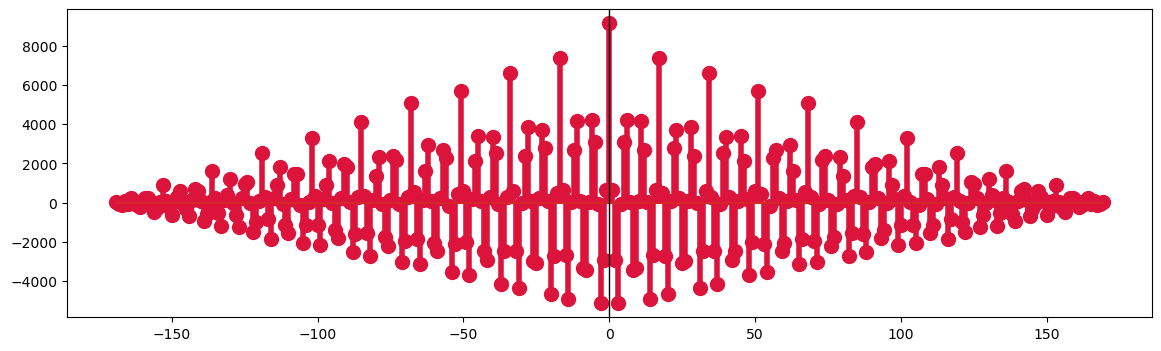

periódica


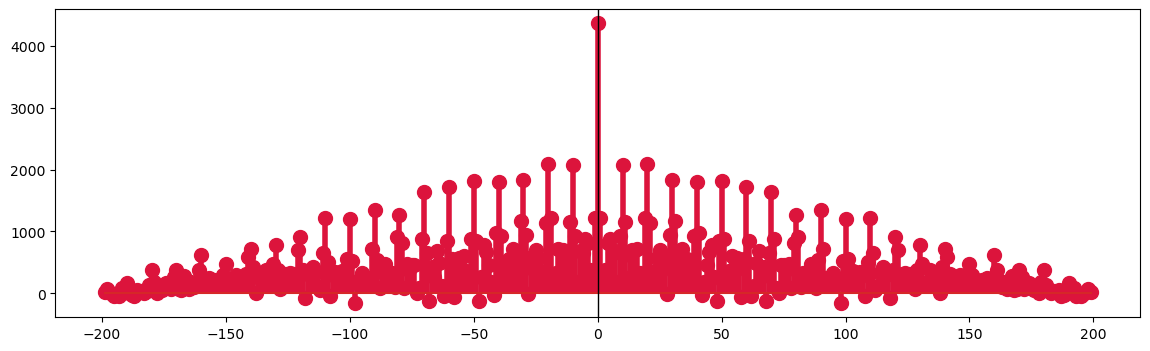

periódica
Para saber el período, mirar la distancia entre los picos


In [7]:
# 3.- Correlaciones
s2 = np.loadtxt('signal2.csv', delimiter=',')
s3 = np.loadtxt('signal3.csv', delimiter=',')
s6 = np.loadtxt('signal6.csv', delimiter=',')

c2 = np.correlate(s2, s2, mode="full")
plot_stem(own_correlation_lags(len(s2), len(s2)), c2)
print("no periódica")

c3 = np.correlate(s3, s3, mode="full")
plot_stem(own_correlation_lags(len(s3), len(s3)), c3)
print("periódica")

c6 = np.correlate(s6, s6, mode="full")
plot_stem(own_correlation_lags(len(s6), len(s6)), c6)
print("periódica")

print("Para saber el período, mirar la distancia entre los picos")